Mohammed Baled's Metric

# Total Amount of Employees/People in the Workforce

Measuring the total amount of employees a neighborhood has- or rather how many people receive an income through their wage or salary- is one of the metrics that we will be using to deduce what the "best" neighborhood is.

## Why Employee Count?

Through a neighborhoods employee count we can measure how active and independent a neighborhood is. We can also measure make a good assumption that the neighborhood that has the most employees, in turn, has the most steady community as each community member can support each other and their community equally. 

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("BinaryWageOrSalary.csv",index_col = 'Id')

In [4]:
data.head(10)

,Neighborhood,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - With wage or salary income,Margin of Error; Total: - With wage or salary income,Estimate; Total: - No wage or salary income,Margin of Error; Total: - No wage or salary income
Id,,,,,,,
1,Allegheny Center,733.0,103.000000,462.0,94.000000,271.0,87.000000
2,Allegheny West,150.0,46.000000,120.0,40.000000,30.0,26.000000
3,Allentown,1138.0,152.751432,772.0,146.771932,366.0,109.389213
4,Arlington,685.0,105.366029,566.0,104.589674,119.0,44.452222
5,Arlington Heights,170.0,69.000000,96.0,58.000000,74.0,52.000000
6,Banksville,2002.0,224.986666,1596.0,226.477372,406.0,145.168867
7,Bedford Dwellings,684.0,63.000000,294.0,69.000000,390.0,77.000000
8,Beechview,3557.0,270.051847,2654.0,249.649755,903.0,162.154248
9,Beltzhoover,869.0,146.594679,586.0,117.187883,283.0,107.712581


 ## Assessing the data at hand

In this data set we see 8 data values given to each row:

1.The Neighborhood\
2.The id\
3.The estimate total amount of people living in a neighborhood\
4.The margin of error for the total amount of people living in a neighborhood\
5.The estimate total amount of people that have a steady flow of income through their wage or salary\
6.The margin of error for the total amount of people that have a steady flow of income through their wage or salary\
7.The estimate amount of people that don't have a steady flow of income through a wage or salary\
8.The margin of error for the total amount of people that don't have a steady flow of income through a wage or salary



##### The id is more or less irrelevant and for the sake of simplicity we won't be taking into account/looking at the margin of errors for the real values we need: The estimate total amount of people that have or don't have a steady flow of income through their wage or salary.

----------

## A Quick Look at the Statistics of our Data

In [5]:
query_mask = data['Estimate; Total:'] > 8
trueData = data[query_mask]

print("Our data set contains a total of " + str(len(data)) + " neighborhoods located in the Pittsburgh area but we have not taken outliers into account and will only be using " + str(len(trueData))+ " of them""\n")
print("The average population of a neighborhood is: " + str(int(trueData["Estimate; Total:"].mean()))+ "\n")
print("The minimum amount of people living in a neighborhood is: " +  str(trueData['Estimate; Total:'].min())+ "\n")
print("The average amount of people in a neighborhood that are in the workforce is: " + str(int(trueData["Estimate; Total: - With wage or salary income"].mean())) + "\n")
print("The average amount of people in a neighborhood that are not in the workforce is: " + str(int(trueData["Estimate; Total: - No wage or salary income"].mean() )))

Our data set contains a total of 91 neighborhoods located in the Pittsburgh area but we have not taken outliers into account and will only be using 89 of them

The average population of a neighborhood is: 1502

The minimum amount of people living in a neighborhood is: 104.0

The average amount of people in a neighborhood that are in the workforce is: 1090

The average amount of people in a neighborhood that are not in the workforce is: 412


-----

## How can we efficiently use our data?

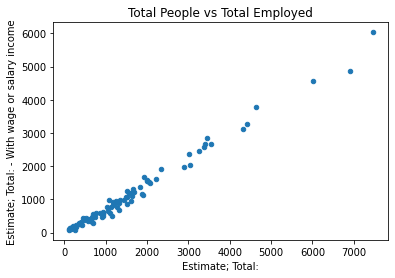

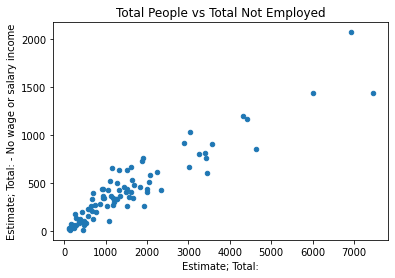

In [6]:
trueData.plot(kind='scatter', x='Estimate; Total:', y='Estimate; Total: - With wage or salary income',
          title="Total People vs Total Employed")

trueData.plot(kind='scatter', x='Estimate; Total:', y='Estimate; Total: - No wage or salary income',
          title="Total People vs Total Not Employed")



The first scatterplot shows a very strong, positive, linear relationship between the total amount of people living in a neighborhood to the amount of employees that neighborhood has, and there are no major outliers in the data. Most of the data seems to be contained within the 100-2500 range.


The second scatterplot shows a moderately strong, positive, linear relationship betweeen the total amount of people living in a neighborhood to the amount of people that are not employed, and there may be a couple outliers. Most of the data seems to be contained within the 100-2500 range aswell.

We would definetely expect both of these scatterplots to take this shape. Due to the graphs linear shape we cannot simply choose the neighborhood that has most amount of people. We must develop a dynamic metric in this case to take into account the neighborhoods population. We can choose to take the ratio of the total amount of people employed in a neighborhood to the total amount of people in that neighborhood.


----

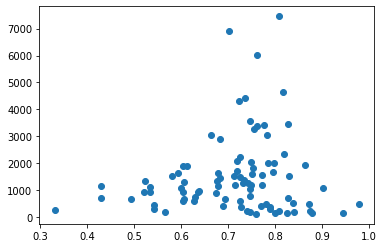

In [73]:
ratioList = []
populationList = []
neighborhoodList = []

ratioTable = {}



ratio = 0
maxRatio = 0;
bestNeighborhood = '';
bestNeighborhoodPop = 0
bestNeighborhoodEmpCount = 0
for index, row in trueData.iterrows():
    neighborhood = row['Neighborhood']
    population = row['Estimate; Total:']
    employeeCount = row['Estimate; Total: - With wage or salary income']
    
    ratio = employeeCount/population
    ratioList.append(ratio)
    populationList.append(population)
    neighborhoodList.append(neighborhood)
    ratioTable[neighborhood] = ratio
    
    if(ratio>maxRatio):
        maxRatio = ratio
        bestNeighborhood = neighborhood
        bestNeighborhoodPop = population
        bestNeighborhoodEmpCount = employeeCount
           
        
    
plt.scatter(ratioList,populationList) ## skewed to the left


 The data comparing the ratio to the total population is approximately normal with a slight skew to the left

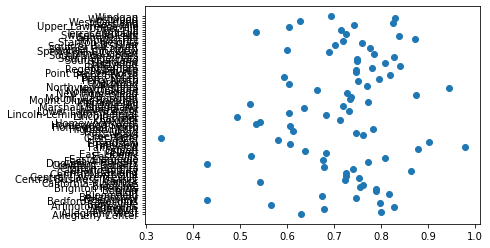

In [77]:
plt.scatter(ratioList,neighborhoodList)


----

## Top ten neighborhood employee count to population ratios

In [78]:
ratioTable  = {k: l for k, l in sorted(ratioTable.items(), key = lambda l: l[1],reverse = True )}

for i in range(10):
    name=list(ratioTable)[i]
    print(str(i+1) + " " +  name + " " + str(ratioTable.get(name)))

1 Fairywood 0.9781181619256017
2 North Shore 0.9432624113475178
3 Friendship 0.9025069637883009
4 Esplen 0.8775510204081632
5 Mt. Oliver 0.8733031674208145
6 Strip District 0.8723849372384938
7 Central Oakland 0.8644421272158499
8 Ridgemont 0.8392857142857143
9 Summer Hill 0.8377862595419847
10 Westwood 0.8289299867899603


-----

## The neighborhood with the best employee count to population ratio

In [79]:
print("The neighborhood with the best employee to population rate of " + str(maxRatio) + " is " + bestNeighborhood + "\n")

print(bestNeighborhood + " has a total population count of " + str(bestNeighborhoodPop) + 
      " with " + str(bestNeighborhoodEmpCount)+ " being employed"   )

The neighborhood with the best employee to population rate of 0.9781181619256017 is Fairywood

Fairywood has a total population count of 457.0 with 447.0 being employed
